In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
import ast
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df = df[df["job_title_short"] == "Data Analyst"]

In [6]:
df_exploded = df.explode("job_skills")

In [7]:
df_exploded.groupby("job_skills").size()

job_skills
airflow       2002
airtable        88
alteryx       4570
angular        376
angular.js       2
              ... 
wrike           39
wsl             16
xamarin          2
yarn            76
zoom           465
Length: 235, dtype: int64

In [11]:
df_skills = df_exploded.groupby("job_skills").agg(
    skill_count = ("job_skills", "count"),
    median_salary = ("salary_year_avg", "median")
)

In [17]:
skill_data = df_skills.sort_values(by = "skill_count", ascending=False).head(10)

In [19]:
skill_data

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


In [30]:
for i, txt in enumerate(skill_data.index):
    plt.txt(skill_data["skill_count"].iloc[i], skill_data["median_salary"].iloc[i])

AttributeError: module 'matplotlib.pyplot' has no attribute 'txt'

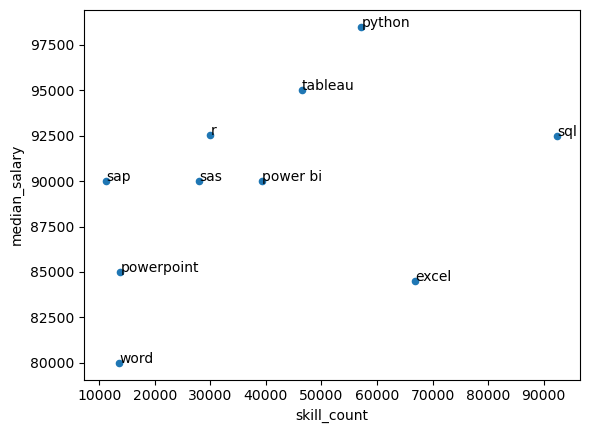

In [37]:
skill_data.plot(kind = "scatter", x = "skill_count", y = "median_salary")
for i, txt in enumerate(skill_data.index):
    plt.text(skill_data["skill_count"].iloc[i], skill_data["median_salary"].iloc[i], txt)
    
